In [1]:
import sys
sys.path.append('../..')

In [2]:
from lib.pdb import get_pdb_names_by_txt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ligand_sasa = np.load('ligand_sasa_general.npy')

In [4]:
single_pocket_proteins = np.array(get_pdb_names_by_txt('/home/ito/research/data/monomer_general_protein.txt'))
print()

In [25]:
ligand_sasa > 0.19 & ligand_sasa < 0.2

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [33]:
single_pocket_proteins[(ligand_sasa > 0.4) & (ligand_sasa < 0.5)]

array(['1ugy', '4x9w', '1skj', '1eol', '1r6n', '1kne', '4e3b', '4j82',
       '3w69', '1tyn', '1a1c', '2eum', '3d6q', '3mpf', '4bh3', '4o75',
       '4hlw', '3d8y', '1p4u', '1ntv', '3so6', '2bdl', '3k26', '5ku3',
       '3l5c', '4tmp', '4lkm', '5dhq', '4erq', '4ge5', '3dxh', '1bkm',
       '4rh5', '4j81', '5a2j', '1u9v', '3bun', '3kwz', '4jjq', '4nud',
       '4abv', '3r69', '5fow', '3dxg', '4ge2', '1n4m', '4os6', '1qja',
       '5ivn', '2qbx', '1f8a', '4e9c', '4ezo', '4aif', '1pdq', '3uvm',
       '4kza', '4uyh', '4d8i', '4ps5', '2ig0', '1at6', '4z2k', '2veu',
       '3bzi', '1wdy', '4mz6', '1w2h', '2zgm', '4os1', '3uvu', '5dhp',
       '1evh', '4od7', '4hyb', '2yns', '3wdc', '2hdx', '4j51', '1lqf',
       '3wde', '1o46', '4yv8', '2co0', '3hbo', '4gq6', '1utc', '1y57',
       '4gwk', '1i3z', '3tl0', '1o4h', '4b60', '3wdd', '3arv', '3fdm',
       '4x3h', '1eoj', '1d4w', '5agv', '3jzr', '3arz', '4j78', '2xoi',
       '1u9x', '4okp', '4j77', '5ez0', '3bc3', '4tzq', '4drn', '1t7f',
      

In [34]:
import shutil

# コピー元のファイルパス
pdb = '1ugy'
source_file1 = f'/mnt/ito/pdbbind_raw/general_set/{pdb}/{pdb}_complex.pdb'
# source_file2 = f'/mnt/dandan/3drism/dir_3DRISM_20181213_155211/{pdb}/{pdb}_ligand.pdb'

# コピー先のディレクトリ
destination_directory = '/home/ito/research/'

# ファイルをコピー
shutil.copy(source_file1, destination_directory)
# shutil.copy(source_file2, destination_directory)

print("ファイルのコピーが完了しました。")

ファイルのコピーが完了しました。


In [5]:
indices = np.where(ligand_sasa < 0.01822527)[0]
fully_surrounded_proteins = np.array(single_pocket_proteins)[indices]

In [6]:
valid_proteins = single_pocket_proteins[~np.isin(single_pocket_proteins, fully_surrounded_proteins)]
print(single_pocket_proteins.shape[0] - fully_surrounded_proteins.shape[0])

3793


In [14]:
with open('/home/ito/research/data/general_valid_proteins.txt', 'w') as f:
    for protein in valid_proteins:
        if protein == '3ppm':
            continue
        f.write(f'{protein}\n')

In [38]:
ligand_sasa[ligand_sasa < 0.01256868].shape
# 0.05, 0.1

(191,)

In [5]:
indices = np.where((ligand_sasa > 49) & (ligand_sasa < 50))[0]
indices

array([], dtype=int64)

In [7]:
all_protein[852]

'1c5x'

In [8]:
ligand_sasa[indices]

array([], dtype=float64)

[0.         0.01822527 0.03645054 0.05467581 0.07290108 0.09112635
 0.10935163 0.1275769  0.14580217 0.16402744 0.18225271 0.20047798
 0.21870325 0.23692852 0.25515379 0.27337906 0.29160433 0.30982961
 0.32805488 0.34628015 0.36450542 0.38273069 0.40095596 0.41918123
 0.4374065  0.45563177 0.47385704 0.49208232 0.51030759 0.52853286
 0.54675813 0.5649834  0.58320867 0.60143394 0.61965921 0.63788448
 0.65610975 0.67433502 0.6925603  0.71078557 0.72901084 0.74723611
 0.76546138 0.78368665 0.80191192 0.82013719 0.83836246 0.85658773
 0.874813   0.89303828 0.91126355]


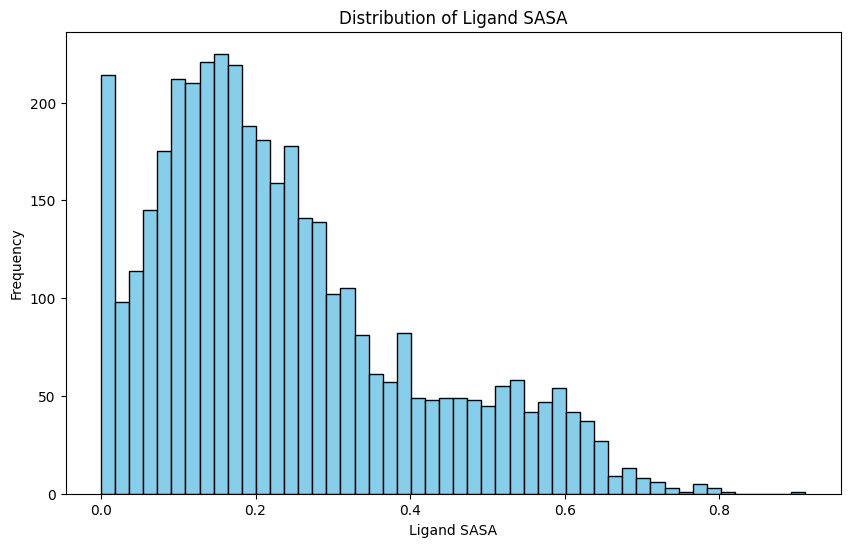

0.15491480295841648


In [7]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(ligand_sasa, bins=50, color='skyblue', edgecolor='black')
print(bins)
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Ligand SASA')
plt.xlabel('Ligand SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [4]:
from lib.pdb import get_all_pdb_names

In [5]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), hydrophobicities):
    if hydrophobicity > 9:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [6]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(2354, 365, 0)

In [6]:
with open('../../../data/pdb_group/ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [7]:
with open('../../../data/pdb_group/ave_SASA_small_9_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [8]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [8]:
with open('../../../data/test_list', mode='r') as f:
    test_pdb_list = f.read().splitlines()
test_pdb_set = set(test_pdb_list)


In [9]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [10]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [10]:
test_hydrophobic = list((test_pdb_set & hydrophobic_set))
test_hydrophilic = list((test_pdb_set & hydrophilic_set))

In [11]:
with open('../../../data/test_ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [12]:
with open('../../../data/test_ave_SASA_small_9_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')